In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load )

# Combine the data into a single dataset
combined_df = pd.merge(ride_df,city_df,on = 'city', how = 'left')


# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

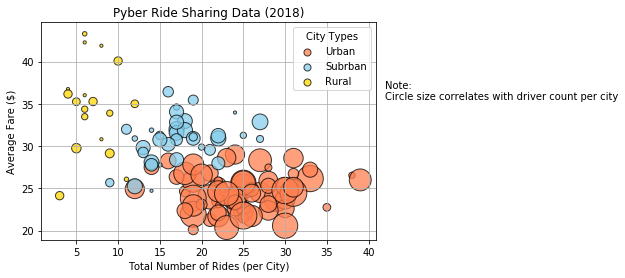

In [19]:
# Obtain the x and y coordinates for each of the three city types
combined_mean_urban = combined_df[combined_df['type'] == 'Urban'].groupby('city').mean()['fare']
combined_mean_urban_drive = combined_df[combined_df['type'] == 'Urban'].groupby('city').mean()['driver_count']
combined_count_urban = combined_df[combined_df['type'] == 'Urban'].groupby('city').count()['ride_id']


combined_mean_suburban = combined_df[combined_df['type'] == 'Suburban'].groupby('city').mean()['fare']
combined_mean_suburban_drive = combined_df[combined_df['type'] == 'Suburban'].groupby('city').mean()['driver_count']
combined_count_suburban = combined_df[combined_df['type'] == 'Suburban'].groupby('city').count()['ride_id']


combined_mean_rural = combined_df[combined_df['type'] == 'Rural'].groupby('city').mean()['fare']
combined_mean_rural_drive = combined_df[combined_df['type'] == 'Rural'].groupby('city').mean()['driver_count']
combined_count_rural = combined_df[combined_df['type'] == 'Rural'].groupby('city').count()['ride_id']

plt.grid()

# Build the scatter plots for each city types
plt.scatter(combined_count_urban, combined_mean_urban, s=combined_mean_urban_drive*10, facecolor="coral", 
            alpha=0.75, edgecolors = 'black' ,label = "Urban")
plt.scatter(combined_count_suburban, combined_mean_suburban, s=combined_mean_suburban_drive*10, facecolor="skyblue", 
            alpha=0.75, edgecolors = 'black' ,label = "Subrban")
plt.scatter(combined_count_rural, combined_mean_rural, s=combined_mean_rural_drive*10, facecolor="gold", 
            alpha=0.75, edgecolors = 'black' ,label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(loc='upper right',title='City Types')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 35.5, "Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("pyber_bubble_plot.png")

# Show plot
plt.show()

## Total Fares by City Type

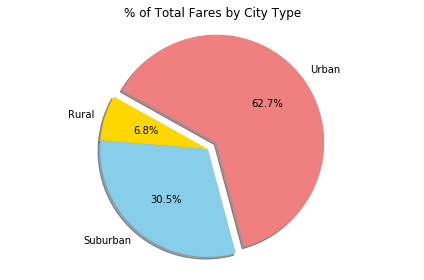

In [9]:
# Calculate Type Percents
total_fare_urban = combined_df[combined_df['type'] == "Urban"].sum()['fare']
total_fare_suburban = combined_df[combined_df['type'] == "Suburban"].sum()['fare']
total_fare_rural = combined_df[combined_df['type'] == "Rural"].sum()['fare']
pie_fare = [total_fare_urban,total_fare_rural,total_fare_suburban]

# Build Pie Chart
labels = ["Urban","Rural","Suburban",]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)
plt.pie(pie_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=285)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("CityFares.png")

# Show Figure
plt.show()

## Total Rides by City Type

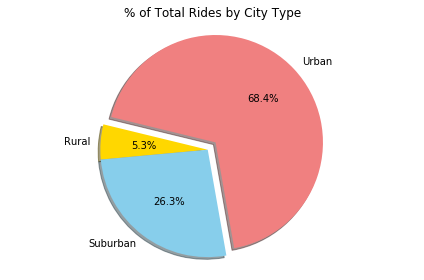

In [13]:
# Calculate Ride Percents
total_ride_urban = combined_df[combined_df['type'] == "Urban"].count()['ride_id']
total_ride_suburban = combined_df[combined_df['type'] == "Suburban"].count()['ride_id']
total_ride_rural = combined_df[combined_df['type'] == "Rural"].count()['ride_id']
pie_ride = [total_ride_urban,total_ride_rural,total_ride_suburban]

# Build Pie Chart
labels = ["Urban","Rural","Suburban",]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)
plt.pie(pie_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=280)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("CityRides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

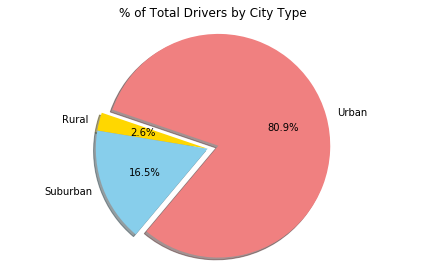

In [14]:
# Calculate Driver Percents
total_drive_urban = city_df[city_df['type'] == "Urban"].sum()['driver_count']
total_drive_suburban =city_df[city_df['type'] == "Suburban"].sum()['driver_count']
total_drive_rural = city_df[city_df['type'] == "Rural"].sum()['driver_count']
pie_drive = [total_drive_urban,total_drive_rural,total_drive_suburban]

# Build Pie Charts
labels = ["Urban","Rural","Suburban",]
colors = ["lightcoral","gold","skyblue"]
explode = (0.1,0,0)
plt.pie(pie_drive, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=230)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("TotalDrivers_City.png")

# Show Figure
plt.show()